In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


%matplotlib inline

In [25]:
df = pd.read_csv("student-mat.csv",sep=";")

In [26]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
df.shape

(395, 33)

In [28]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [30]:
df.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

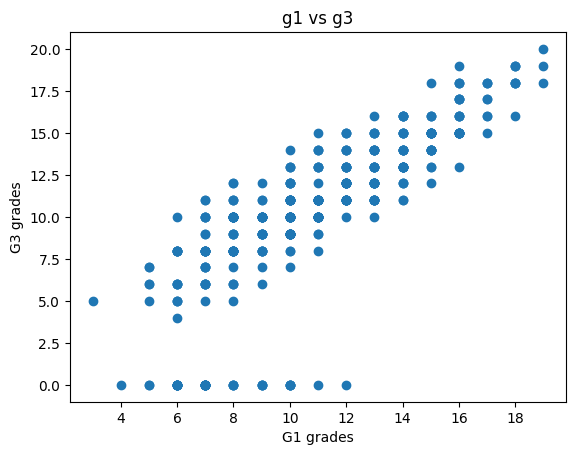

In [31]:
x = df.G1
y = df.G3

plt.scatter(x,y)
plt.xlabel('G1 grades')
plt.ylabel('G3 grades')
plt.title('g1 vs g3')
plt.show()

In [38]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [40]:
X = df.drop(['G3'], axis='columns')
y = df['G3']

In [49]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the column transformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # To keep other columns unchanged
)

# Define the pipeline with preprocessing and model
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Output to confirm the model has been trained
print('Trained the algorithm')

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Make predictions (optional, for example purposes)
y_pred = lr.predict(X_test)

# Display predictions (optional)
print(f"Predictions: {y_pred}")

Trained the algorithm
X_train shape: (316, 58)
y_train shape: (316,)
X_test shape: (79, 58)
y_test shape: (79,)
Predictions: [14.18887891 10.73103633  9.39625794 15.5454804  16.56181083 11.73550778
 13.27107734 10.30544912  8.14867094 13.5893847   7.11230272 15.79668457
 11.32619164  8.95713485 15.09467814 14.8896274  12.90605612  8.03845289
  9.05535576 14.4998701   6.36322745  2.5581412   5.94801207 14.67381621
 11.55206275 15.53258284  9.24932967 20.49869664 -0.64824036 13.2420446
 -1.18689397  6.42215239  7.51650821  5.34904968 12.64542374 10.64511041
 13.46452245 18.57102315  8.63164262 11.51622284  4.21283983 19.0589816
  7.08340586  7.95285086 10.21324741 -3.26625123 11.72857591  4.95418363
 11.66664396  6.67071535  9.09850319 17.88195676 12.8659623   7.62639527
 12.40074456  9.13906852  9.17275131 11.81525305 15.69991541 13.38147747
 13.12732464 13.28304868 13.47993452 16.17318645  7.47873948 16.37853365
 18.53770581 11.08489105  4.48816795  9.17758486  9.65394491 13.67400057
 

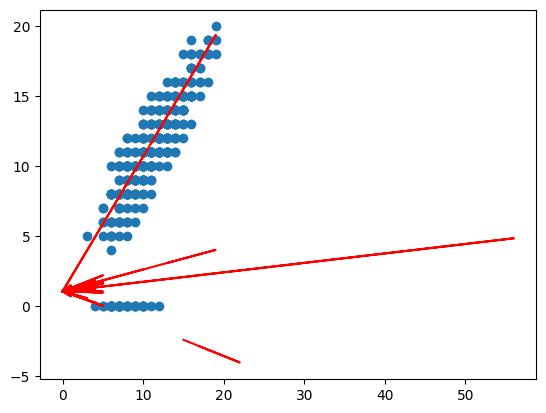

In [50]:
m = lr.coef_
c = lr.intercept_

line = m * X_train + c

plt.scatter(x, y)
plt.plot(X_train, line, color='r')
plt.show()

In [52]:
print('Accuracy of the model is: ', lr.score(X_test, y_test) * 100)

Accuracy of the model is:  78.8132132115856
